Nama Kelompok 

1. Natasha Eva Dwi Nurdiyanti  2311110005

2. Ersa Amelia                 2311110009

3. Avrilia Viananda Nagita     2311110010

4. Rifka Annisa Swasthi        2311110040

5. Yasmine Alifta              2311110044


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 



In [27]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\StudentsPerformance_with_headers.csv')
print(df)



     STUDENT ID  Student Age  Sex  Graduated high-school type  \
0      STUDENT1            2    2                           3   
1      STUDENT2            2    2                           3   
2      STUDENT3            2    2                           2   
3      STUDENT4            1    1                           1   
4      STUDENT5            2    2                           1   
..          ...          ...  ...                         ...   
140  STUDENT141            2    1                           2   
141  STUDENT142            1    1                           2   
142  STUDENT143            1    1                           1   
143  STUDENT144            2    1                           2   
144  STUDENT145            1    1                           1   

     Scholarship type  Additional work  Regular artistic or sports activity  \
0                   3                1                                    2   
1                   3                1                       

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated high-school type                                         145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional work                                                    145 non-null    int64 
 6   Regular artistic or sports activity                                145 non-null    int64 
 7   Do you have a partner              

1. Summary statistics dari data

In [28]:
summary_stats = df.describe()


In [12]:
print(summary_stats)

       Student Age         Sex  Graduated high-school type  Scholarship type  \
count   145.000000  145.000000                  145.000000        145.000000   
mean      1.620690    1.600000                    1.944828          3.572414   
std       0.613154    0.491596                    0.537216          0.805750   
min       1.000000    1.000000                    1.000000          1.000000   
25%       1.000000    1.000000                    2.000000          3.000000   
50%       2.000000    2.000000                    2.000000          3.000000   
75%       2.000000    2.000000                    2.000000          4.000000   
max       3.000000    2.000000                    3.000000          5.000000   

       Additional work  Regular artistic or sports activity  \
count       145.000000                           145.000000   
mean          1.662069                             1.600000   
std           0.474644                             0.491596   
min           1.000000     

2. Eksplorasi data, sajikan data yang mungkin dalam beragam diagram  chart


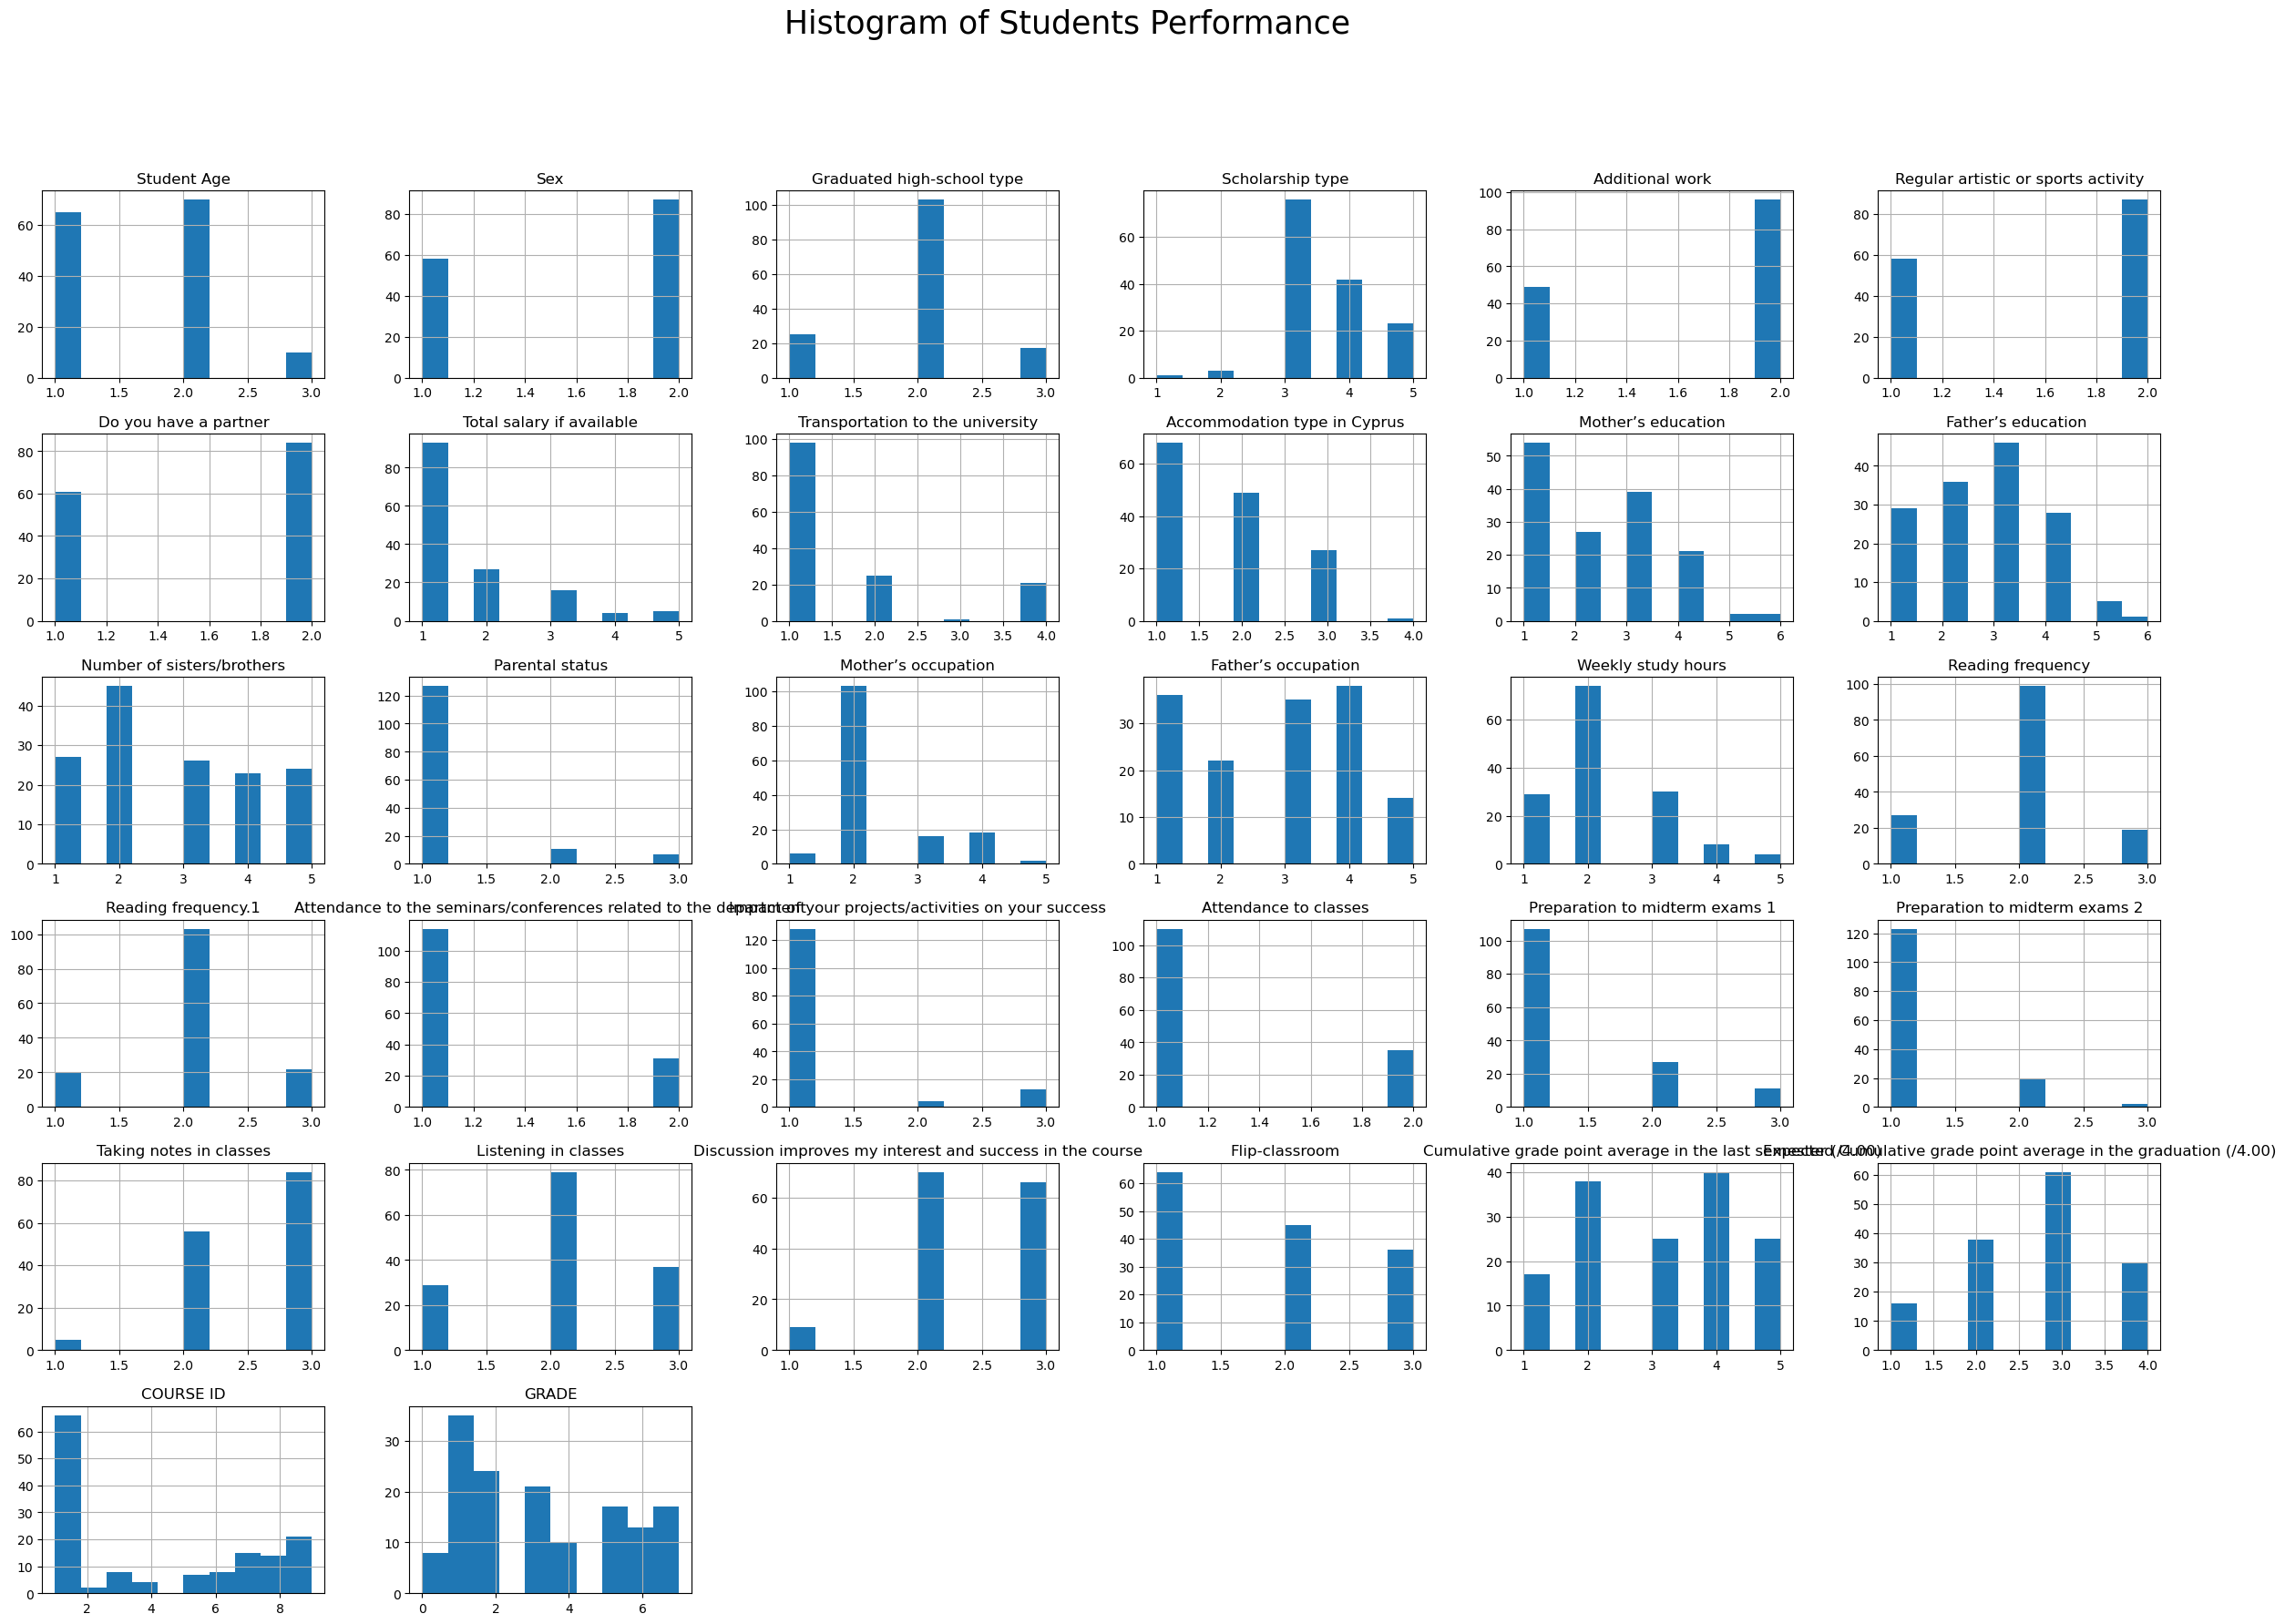

In [13]:

def plot_histogram(data):
    data.hist(figsize=(30, 20))
    plt.suptitle('Histogram of Students Performance', fontsize=25)
    plt.show()

plot_histogram(df)


Mayoritas siswa dalam dataset ini cenderung berusia muda, dengan sebagian besar berada pada rentang usia 1.0 hingga 1.5 dalam skala yang diberikan yaitu usia 18-21 tahun. Terdapat puncak kedua di tengah, yaitu pada nilai 2.0, yang menunjukkan bahwa ada sebagian siswa yang berusia sedikit lebih tua dari mayoritas yaitu di rentang usia 22-25 tahun. Namun, jumlah siswa yang berusia lebih tua sangat sedikit, yang tercermin pada nilai 3.0 yaitu diatas 26 tahun. Hal ini menunjukkan bahwa sebagian besar siswa adalah generasi muda, yang bisa berdampak pada preferensi dan pola perilaku mereka dalam berbagai aspek kehidupan.

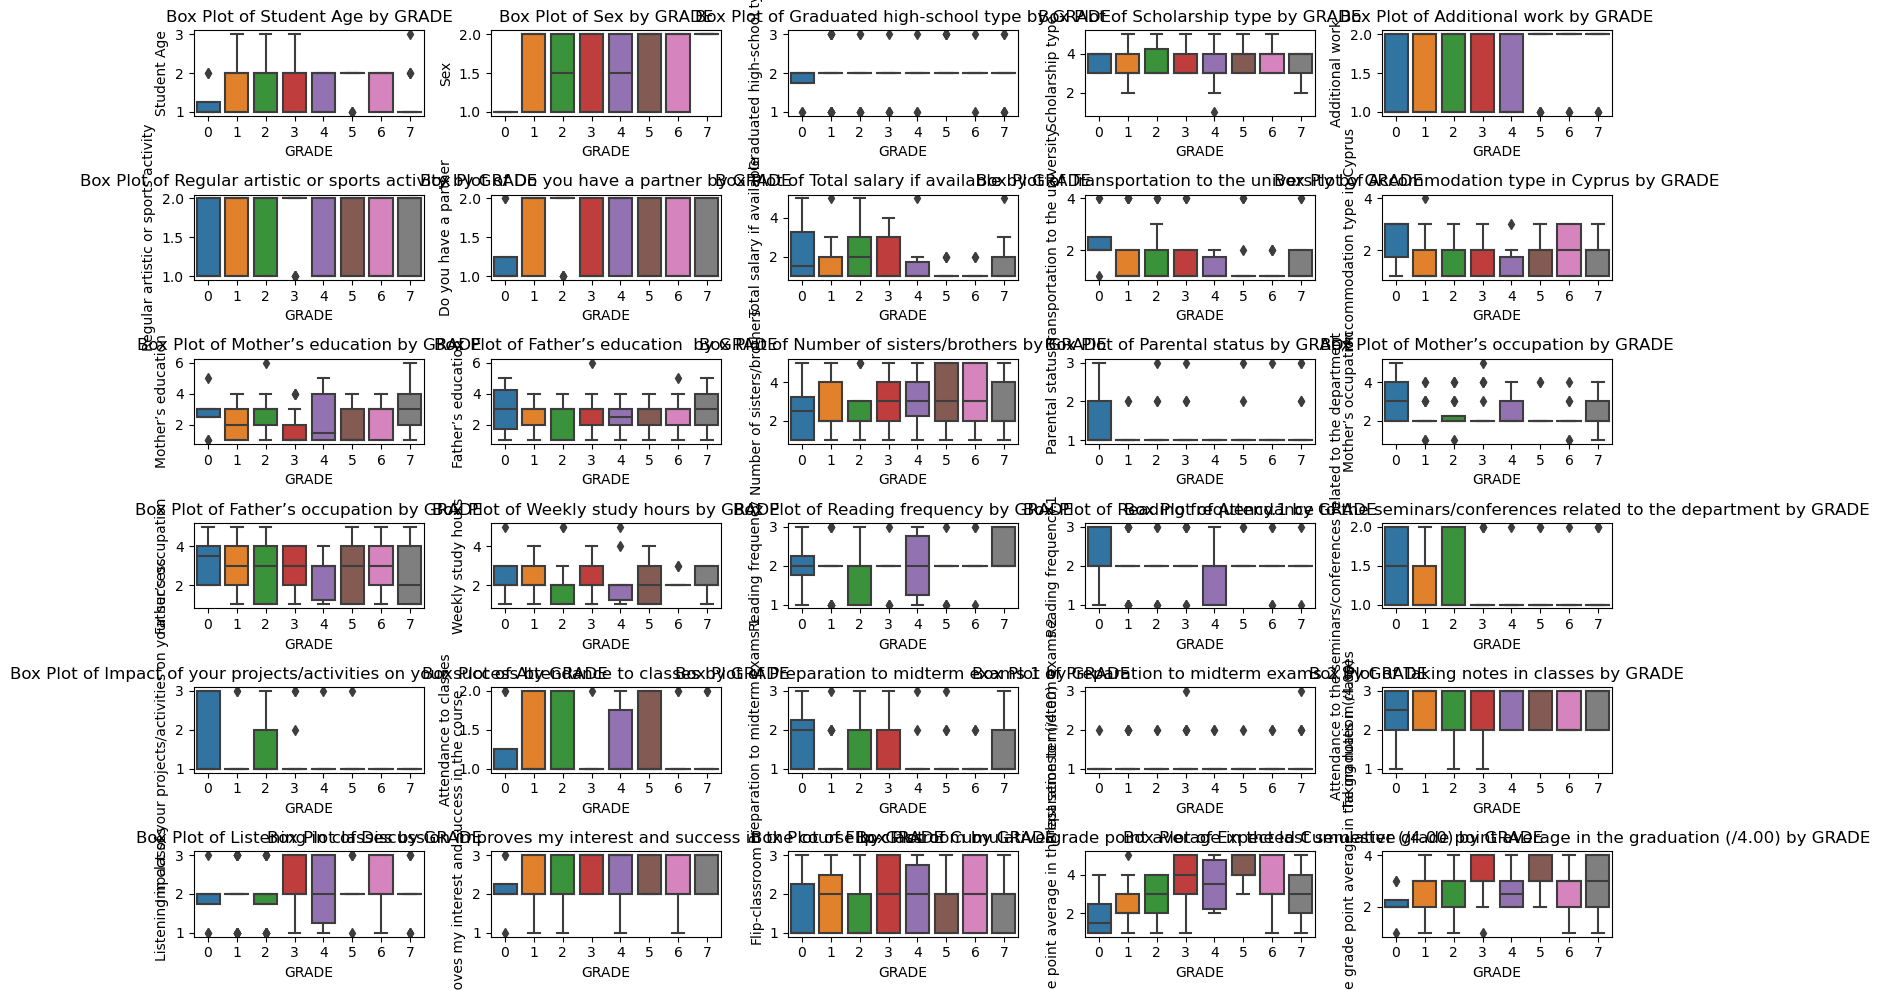

In [7]:

def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[1:-2]):  
        plt.subplot(6, 5, i + 1)  
        sns.boxplot(x='GRADE', y=column, data=data)
        plt.title(f'Box Plot of {column} by GRADE')
    plt.tight_layout()
    plt.show()

plot_boxplots(df)


Pada Box Plot pertama, menunjukkan distribusi usia siswa berdasarkan tingkat grade, dari grade 0 hingga 7. Terlihat ada peningkatan usia yang konsisten seiring naiknya tingkat grade, dengan variasi usia yang ditunjukkan oleh ukuran kotak dan whiskers. Setiap tingkat kelas memiliki rentang usia yang berbeda, dengan beberapa outlier yang menunjukkan adanya siswa yang lebih tua atau lebih muda dari rata-rata. Meskipun ada variasi, pola umum yang muncul adalah hubungan positif antara tingkat kelas dan usia siswa, di mana median usia meningkat secara bertahap seiring naiknya kelas, meskipun ada tumpang tindih usia antar tingkat kelas yang berdekatan.

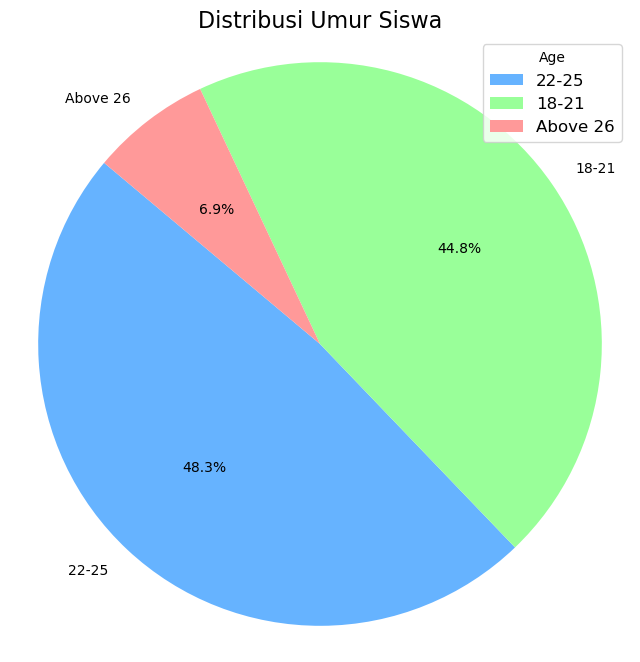

In [22]:
import matplotlib.pyplot as plt

grade_counts = df['Student Age'].value_counts()

age_map = {1: '18-21', 2: '22-25', 3: 'Above 26'}

age_labels = grade_counts.index.map(age_map)

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=age_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2'])

plt.title('Distribusi Umur Siswa', fontsize=16)

plt.legend(age_labels, title="Age", loc="best", fontsize=12)

plt.axis('equal')

plt.show()


Berdasarkan diagram pie tersebut, distribusi umur siswa menunjukkan bahwa mayoritas siswa berada dalam dua kelompok usia utama: 22-25 tahun (48.3%) dan 18-21 tahun (44.8%), yang bersama-sama mencakup lebih dari 93% dari total populasi siswa. Hanya sebagian kecil siswa, yaitu 6.9%, yang berusia di atas 26 tahun. Distribusi ini mengindikasikan bahwa pendidikan tersebut didominasi oleh siswa usia muda yang berada dalam rentang umur tipikal untuk pendidikan tinggi, dengan kelompok usia 22-25 tahun sedikit lebih banyak dibandingkan kelompok 18-21 tahun.

3. Uji korelasi

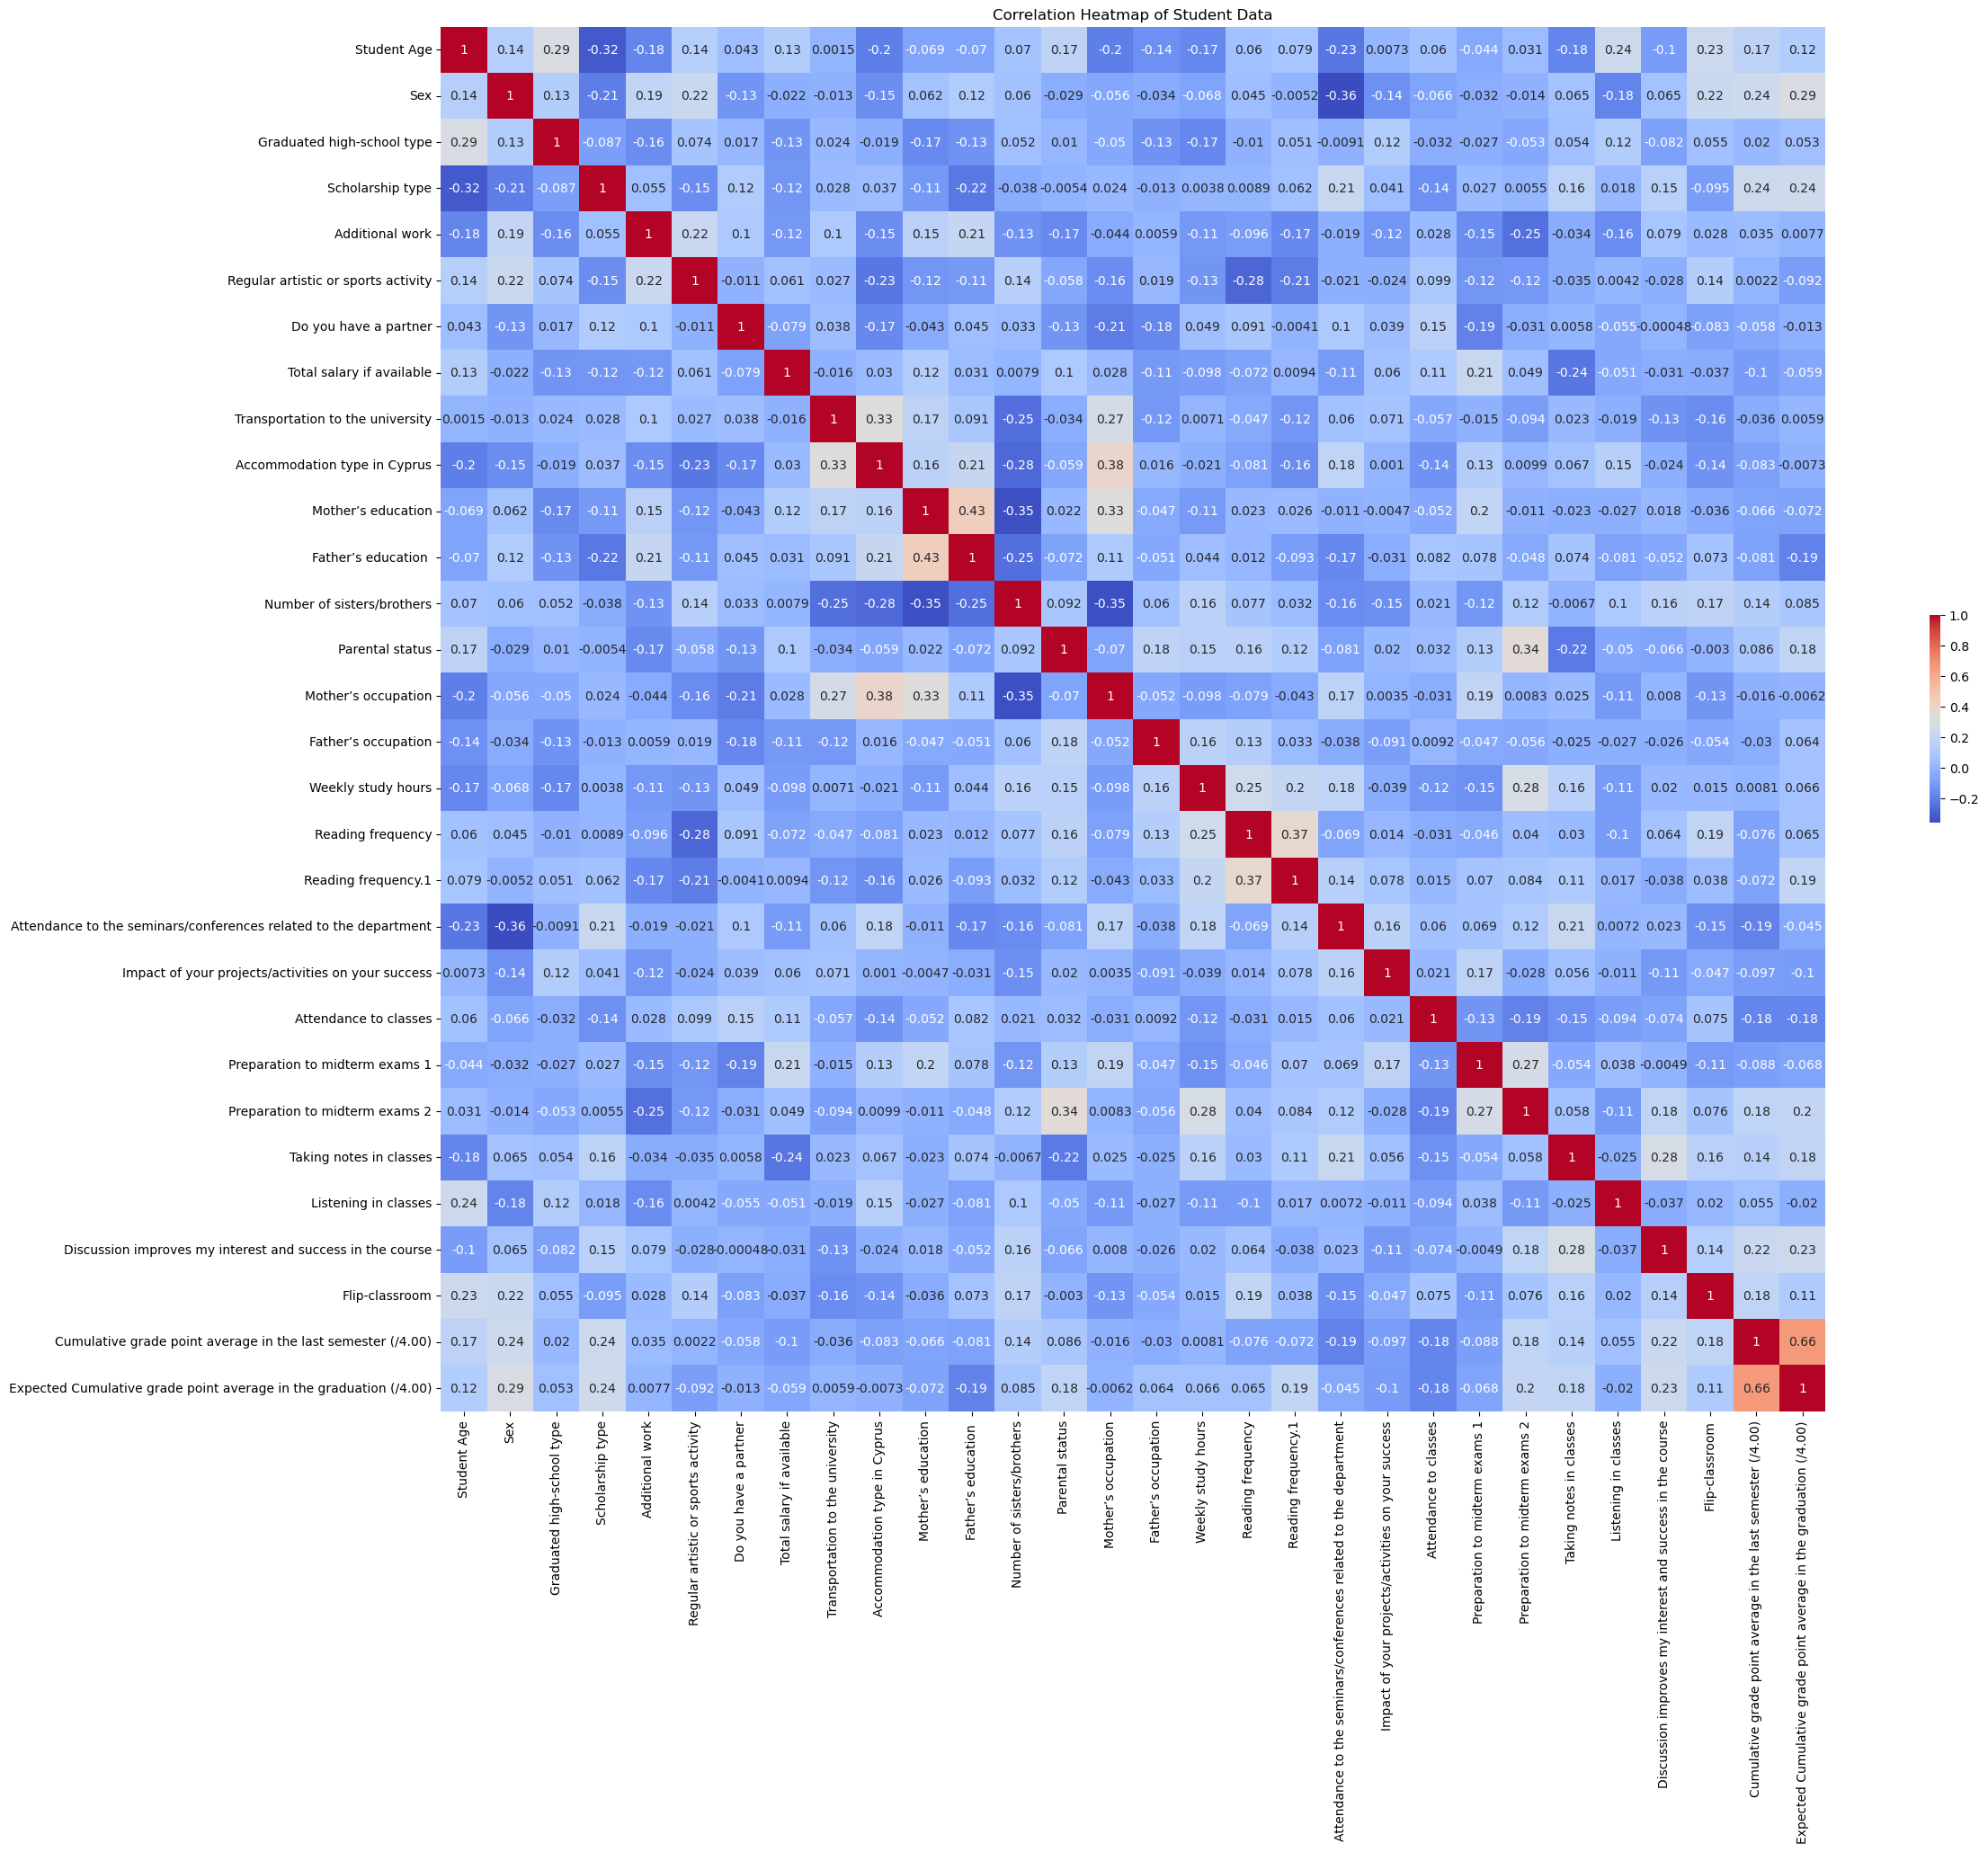

In [33]:
numerical_columns = df.drop(['STUDENT ID', 'COURSE ID', 'GRADE'], axis=1)

plt.figure(figsize=(30, 20))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .15})
plt.title('Correlation Heatmap of Student Data')
plt.show()




Analisis Korelasi menggunakan HeatMap diatas yaitu :
1. Korelasi Positif (Warna Merah tua)
Contohnya pada kolom "Cumulative grade point average in the last semester" menunjukan hubungan korelasi yang positif cukup tinggi dengan kolom "Expected Cumulative grade point average in the graduation"  yang berarti menunjukan bahwa nilai rata rata kumulatif di semester akhir sangat berhubungan dengan ekspektasi nilai rata rata pada saat kelulusan.

2. Korelasi Negatif (Warna biru tua)
Contohnya pada kolom "Reading Frequency (1-5 scale)" memiliki korelasi negatif dengan variabel lain. Karena dalam hasil heat map banyak terdapat hasil diatas 0,2.

3. Korelasi Netral
Variabel netral adalah variabel yang berada di range 0 dsampai -0.1 artinya tidak terlalu berpihak pada korelasi negatif ataupun positif

In [38]:
plt.savefig('output_visualization.png')

<Figure size 640x480 with 0 Axes>

In [40]:

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="Laporan Hasil Eksplorasi", ln=True, align='C')
pdf.output('laporan_eksplorasi.pdf')

NameError: name 'FPDF' is not defined